# Import necessary libraries for data handling, analysis and visualisation

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the energy consumption dataset

In [3]:
df = pd.read_csv('/Con_hourly.csv')

# Preview the first few records of the dataset


In [4]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


# Set 'Datetime' as the index and convert it to datetime type

In [5]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

# Random sample of 10 records for initial data inspection

In [6]:
df.sample(10)

,AEP_MW
Datetime,
2014-12-07 19:00:00,16700.0
2008-12-08 09:00:00,20864.0
2017-04-10 05:00:00,11023.0
2016-12-05 21:00:00,16383.0
2009-04-02 07:00:00,15306.0
2005-08-27 07:00:00,13084.0
2016-08-29 09:00:00,16027.0
2007-02-13 23:00:00,18845.0
2015-10-12 14:00:00,14528.0


# Make a copy of the original data to preserve its state

In [7]:
data = df.copy()

# Print dataset shape, info, and basic statistics

In [8]:
df.shape

(121273, 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [10]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


# Check for null values

In [11]:
df.isnull().sum()

AEP_MW    0
dtype: int64

# Check the number of unique values in 'AEP_MW' (energy consumption in MW)

In [12]:
df.AEP_MW.nunique()

12643

# Visualize the distribution of 'AEP_MW' via boxplot and histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1afa63d780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1afa63dcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1afa63d4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1afa63e200>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1afa63e4a0>],
 'means': []}

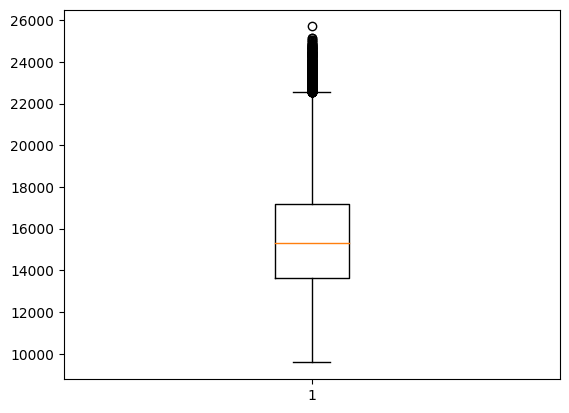

In [13]:
plt.boxplot(df['AEP_MW'])

(array([ 3602., 15690., 24621., 30086., 22238., 14188.,  7396.,  2709.,
          673.,    70.]),
 array([ 9581. , 11192.4, 12803.8, 14415.2, 16026.6, 17638. , 19249.4,
        20860.8, 22472.2, 24083.6, 25695. ]),
 <BarContainer object of 10 artists>)

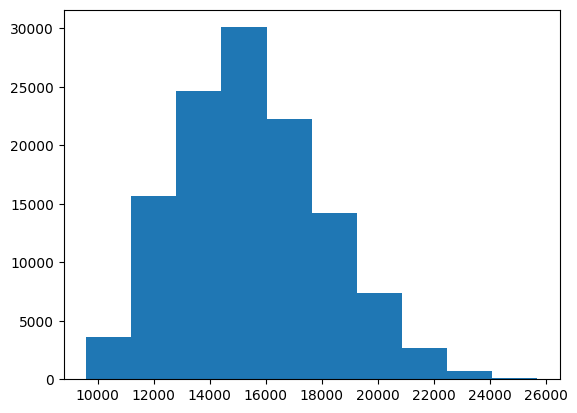

In [14]:
plt.hist(df['AEP_MW'])

# Plot the energy consumption over time

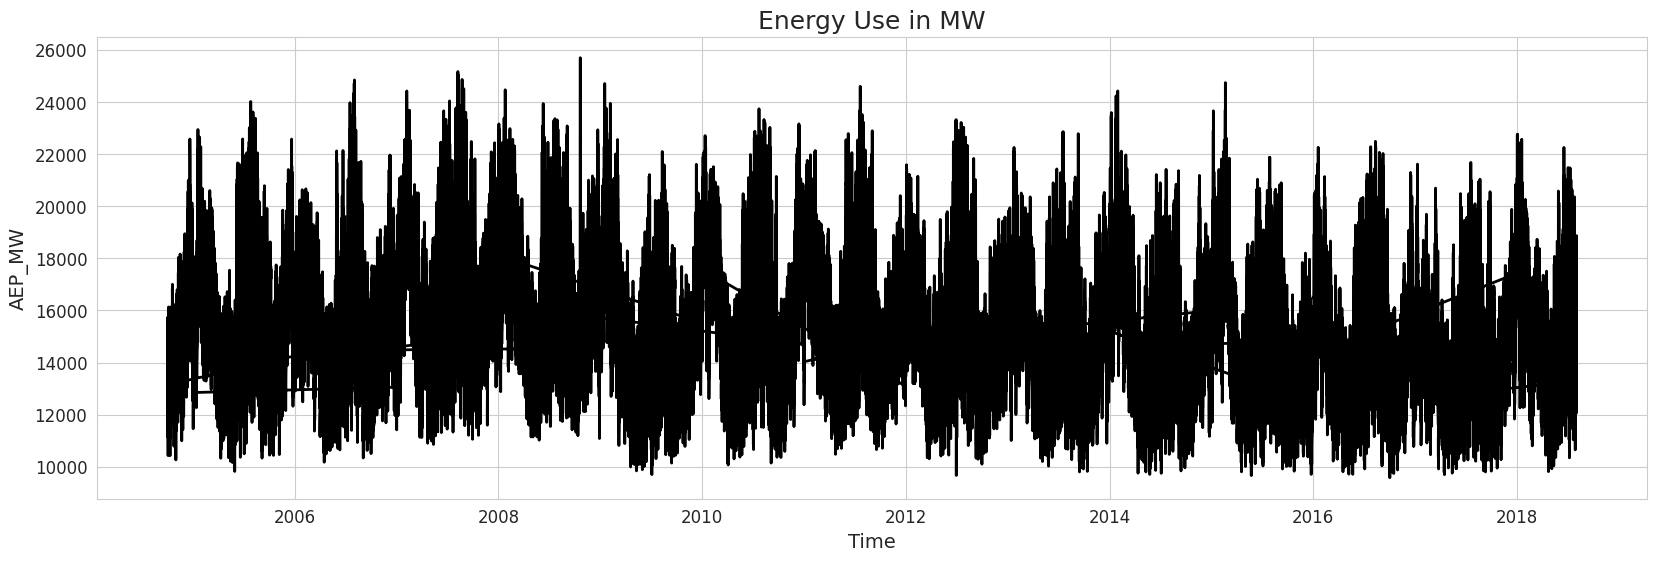

In [15]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df['AEP_MW'], linewidth=2, color='black')

ax.set_title('Energy Use in MW', fontsize=18)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('AEP_MW', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

In [16]:
df['hour'] = df.index.hour

In [17]:
df

,AEP_MW,hour
Datetime,,
2004-12-31 01:00:00,13478.0,1
2004-12-31 02:00:00,12865.0,2
2004-12-31 03:00:00,12577.0,3
2004-12-31 04:00:00,12517.0,4
2004-12-31 05:00:00,12670.0,5
...,...,...
2018-01-01 20:00:00,21089.0,20
2018-01-01 21:00:00,20999.0,21
2018-01-01 22:00:00,20820.0,22


# Extract relevant time features from the datetime index

In [18]:
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

In [19]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,1,1


In [20]:
df.index = pd.to_datetime(df.index)

In [21]:
df.year.value_counts()

2016    8784
2008    8782
2012    8781
2015    8760
2017    8760
2014    8759
2005    8758
2006    8758
2007    8758
2009    8758
2011    8758
2013    8758
2010    8757
2018    5136
2004    2206
Name: year, dtype: int64

In [24]:
df_agg

,Datetime,AEP_MW
0,1970-01-01 00:00:00.000002004,15176.724388
1,1970-01-01 00:00:00.000002005,15842.990865
2,1970-01-01 00:00:00.000002006,15737.224252
3,1970-01-01 00:00:00.000002007,16645.519297
4,1970-01-01 00:00:00.000002008,16536.655659
5,1970-01-01 00:00:00.000002009,15254.111669
6,1970-01-01 00:00:00.000002010,16008.619504
7,1970-01-01 00:00:00.000002011,15815.389472
8,1970-01-01 00:00:00.000002012,15352.940667
9,1970-01-01 00:00:00.000002013,15198.211578


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import xgboost as xgb

# Divide data into training and test sets

In [ ]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

In [ ]:
df.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [ ]:
train.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

# Define the feature set and target variable

In [ ]:
X = df[['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']]

In [ ]:
y = df[['AEP_MW']]

In [ ]:
X

,dayofyear,hour,dayofweek,quarter,month,year
Datetime,,,,,,
2004-12-31 01:00:00,366,1,4,4,12,2004
2004-12-31 02:00:00,366,2,4,4,12,2004
2004-12-31 03:00:00,366,3,4,4,12,2004
2004-12-31 04:00:00,366,4,4,4,12,2004
2004-12-31 05:00:00,366,5,4,4,12,2004
...,...,...,...,...,...,...
2018-01-01 20:00:00,1,20,0,1,1,2018
2018-01-01 21:00:00,1,21,0,1,1,2018
2018-01-01 22:00:00,1,22,0,1,1,2018


In [ ]:
y

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


# Define the hyperparameter grid for tuning

In [ ]:
# Set up XGBoost model
model = xgb.XGBRegressor()

# Set up hyperparameter grid for tuning
params = {
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 4, 5],
        'subsample': [0.5, 0.6, 0.7],
        'colsample_bytree': [0.5, 0.6, 0.7],
        'n_estimators': [50, 100, 150],
        'objective': ['reg:squarederror']
}

# Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up grid search with time series cross-validation
grid_search = GridSearchCV(
    model, param_grid=params, cv=tscv, n_jobs=-1
)

# Fit grid search to data
grid_search.fit(X, y)

# Print best hyperparameters and corresponding score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.7}
Best score:  0.6331578437754131


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Set up XGBoost model with best hyperparameters
model = xgb.XGBRegressor(**grid_search.best_params_)

# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print MSE and MAE
print('MSE: ', mse)
print('Rmse', rmse)
print('MAE: ', mae)

MSE:  2894778.026771806
Rmse 1701.4047216261645
MAE:  1299.6674734027133


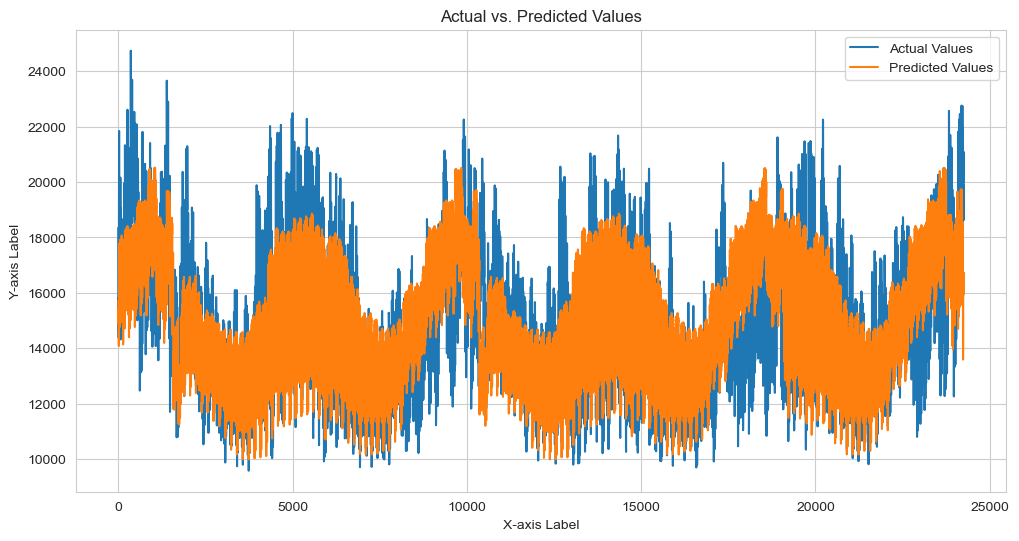

In [ ]:
# Create a line plot for actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values')

# Create a line plot for predicted values
plt.plot(y_pred, label='Predicted Values')

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
y_test.shape

(24255, 1)

In [ ]:
y_pred.shape

(24255,)

In [ ]:
best_model = grid_search.best_estimator_

# Get feature importances
importances = best_model.feature_importances_

# Create a dictionary with feature names and their importances
feature_importances = dict(zip(X.columns, importances))

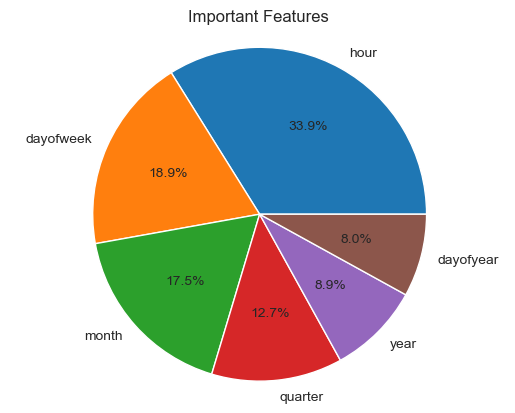

In [ ]:
# Sort the feature importances by descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 features and their importances
top_features = [x[0] for x in sorted_importances[:10]]
top_importances = [x[1] for x in sorted_importances[:10]]

# Pie chart for the top 10 features
plt.pie(top_importances, labels=top_features, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Important Features')
plt.show()

# ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data = df['AEP_MW']

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Generate predictions for the test data
predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# Calculate error metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Forecast future 12 values
forecast = model_fit.forecast(steps=12)
print('Forecasted Values:', forecast)

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dat

                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                97018
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -739972.300
Date:                Mon, 26 Jun 2023   AIC                        1479950.601
Time:                        19:04:47   BIC                        1479979.049
Sample:                             0   HQIC                       1479959.246
                              - 97018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6305      0.003    202.695      0.000       0.624       0.637
ma.L1          0.0054      0.003      1.578      0.114      -0.001       0.012
sigma2      2.468e+05    398.739    618.975      0.0

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 21551914.617073026
Mean Absolute Error: 4082.8102644967407
Forecasted Values: 97018    18625.872319
97019    18707.129518
97020    18758.364201
97021    18790.668942
97022    18811.037884
97023    18823.881008
97024    18831.978917
97025    18837.084850
97026    18840.304268
97027    18842.334190
97028    18843.614107
97029    18844.421126
Name: predicted_mean, dtype: float64


/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
train_data

Datetime
2004-12-31 01:00:00    13478.0
2004-12-31 02:00:00    12865.0
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
                        ...   
2015-03-07 04:00:00    17331.0
2015-03-07 05:00:00    17484.0
2015-03-07 06:00:00    17855.0
2015-03-07 07:00:00    18292.0
2015-03-07 08:00:00    18497.0
Name: AEP_MW, Length: 97018, dtype: float64

In [ ]:
test_data

Datetime
2015-03-07 09:00:00    18343.0
2015-03-07 10:00:00    17768.0
2015-03-07 11:00:00    17163.0
2015-03-07 12:00:00    16433.0
2015-03-07 13:00:00    15798.0
                        ...   
2018-01-01 20:00:00    21089.0
2018-01-01 21:00:00    20999.0
2018-01-01 22:00:00    20820.0
2018-01-01 23:00:00    20415.0
2018-01-02 00:00:00    19993.0
Name: AEP_MW, Length: 24255, dtype: float64

In [ ]:
predictions

97018     18625.872319
97019     18707.129518
97020     18758.364201
97021     18790.668942
97022     18811.037884
              ...     
121268    18845.798339
121269    18845.798339
121270    18845.798339
121271    18845.798339
121272    18845.798339
Name: predicted_mean, Length: 24255, dtype: float64

# LSTM

In [25]:
data.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


# Prepare Data for LSTM Model

In [26]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 24

X, y = create_dataset(data, data.AEP_MW, time_steps)


In [27]:
X.shape

(121249, 24, 1)

In [28]:
y.shape

(121249,)

# Train the Model

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(24, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
3032/3032 [==============================] - 35s 11ms/step - loss: 6504866.5000 - val_loss: 1697303.0000
Epoch 2/10
3032/3032 [==============================] - 29s 9ms/step - loss: 2240544.0000 - val_loss: 3434244.7500
Epoch 3/10
3032/3032 [==============================] - 26s 9ms/step - loss: 1743992.6250 - val_loss: 692310.3750
Epoch 4/10
3032/3032 [==============================] - 27s 9ms/step - loss: 475207.1875 - val_loss: 347512.7188
Epoch 5/10
3032/3032 [==============================] - 26s 8ms/step - loss: 290896.9375 - val_loss: 226794.9062
Epoch 6/10
3032/3032 [==============================] - 27s 9ms/step - loss: 220857.3438 - val_loss: 267147.1875
Epoch 7/10
3032/3032 [==============================] - 25s 8ms/step - loss: 183388.3125 - val_loss: 174747.8281
Epoch 8/10
3032/3032 [==============================] - 26s 8ms/step - loss: 187496.2344 - val_loss: 184523.3906
Epoch 9/10
3032/3032 [==============================] - 25s 8ms/step - loss: 178556.2812 -

In [37]:
yhat = model.predict(X_test)

758/758 [==============================] - 2s 2ms/step


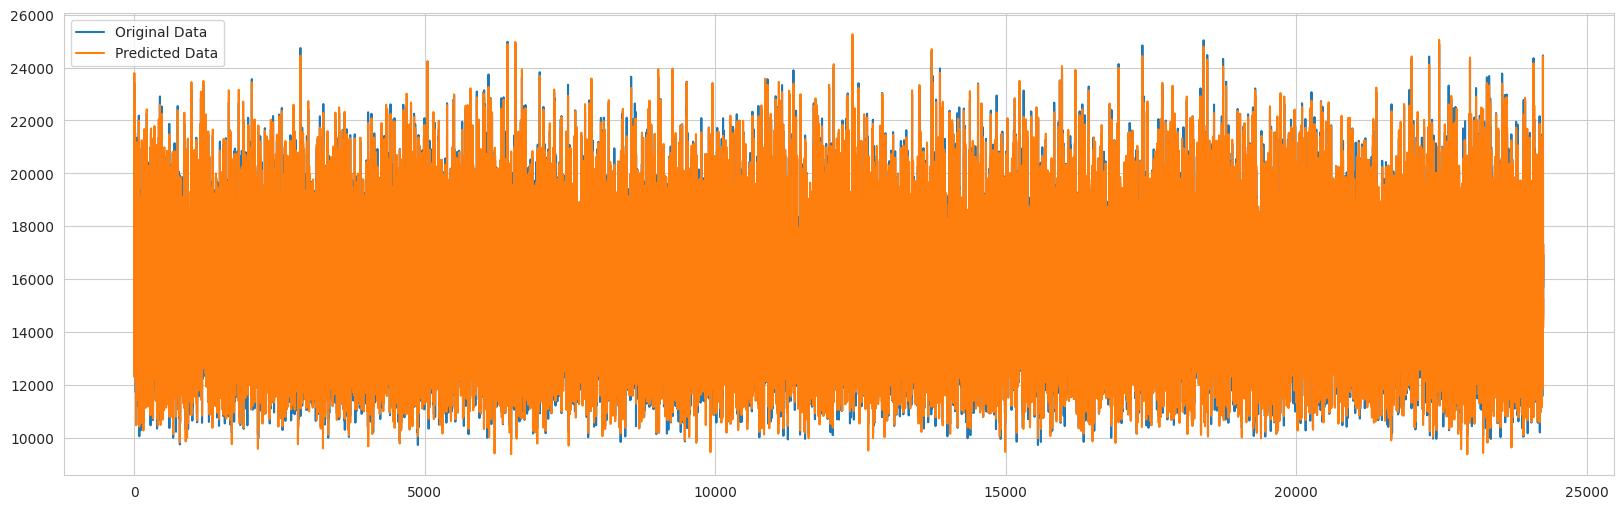

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(y_test, label='Original Data')
plt.plot(yhat, label='Predicted Data')
plt.legend()
plt.show()

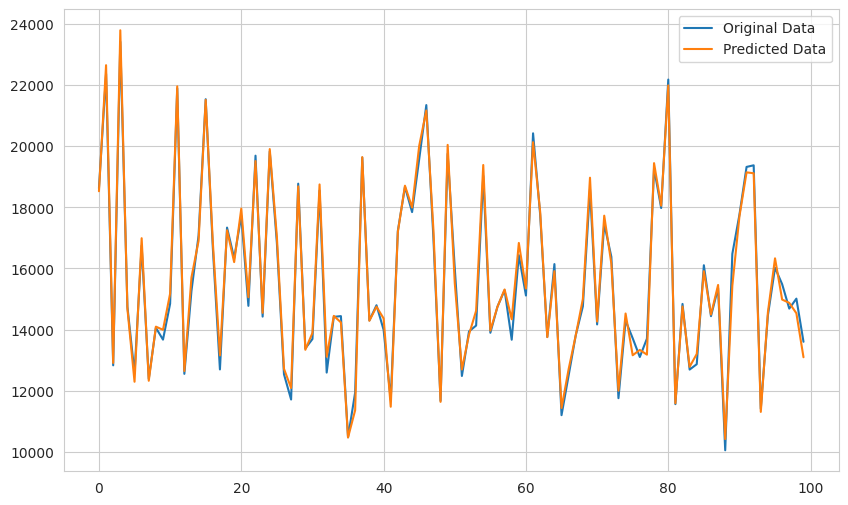

In [40]:
start_idx = 0
end_idx = 100

plt.figure(figsize=(10, 6))
plt.plot(y_test[start_idx:end_idx], label='Original Data')
plt.plot(yhat[start_idx:end_idx], label='Predicted Data')
plt.legend()
plt.show()

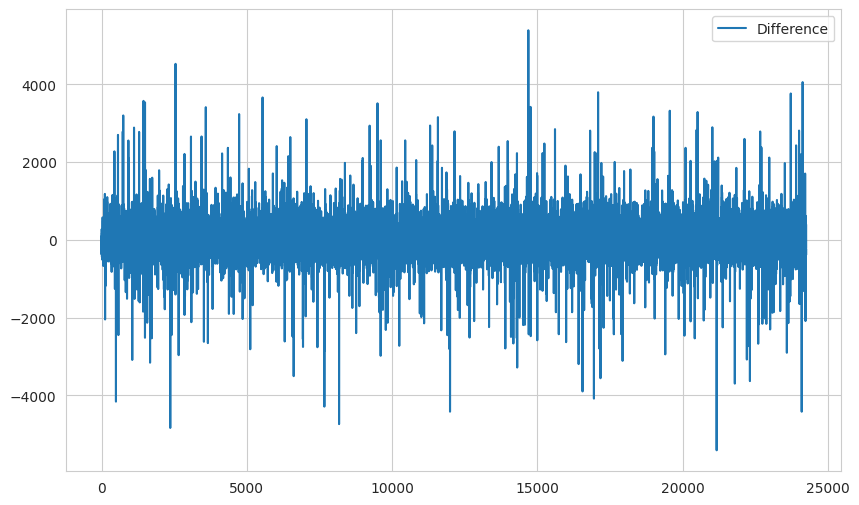

In [41]:
diff = y_test - yhat.flatten()

plt.figure(figsize=(10, 6))
plt.plot(diff, label='Difference')
plt.legend()
plt.show()